<a href="https://colab.research.google.com/github/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/copiaengithub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

In [16]:
data=pd.read_csv("https://github.com/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/AEP_hourly.csv?raw=true")
data.iloc[::-1]
data.shape


(121273, 2)

In [21]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [25]:
data["Datetime"]=pd.to_datetime(data["Datetime"])
data["Datetime"]=pd.to_numeric(data["Datetime"])
data.head()

,Datetime,AEP_MW
0,1104454800000000000,13478.0
1,1104458400000000000,12865.0
2,1104462000000000000,12577.0
3,1104465600000000000,12517.0
4,1104469200000000000,12670.0


In [26]:
x=data["Datetime"]
y=data["AEP_MW"]
x=x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [28]:
lm.score(x,y)

0.03415269556161116

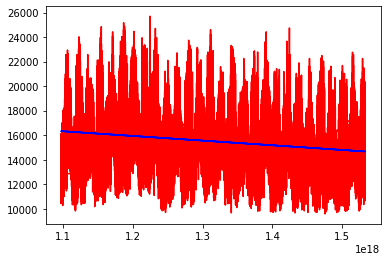

In [29]:
plt.plot(x,y, color="red")
plt.plot(x,lm.predict(x), color="blue")

In [30]:
poly =PolynomialFeatures(degree=15)
poly

PolynomialFeatures(degree=15)

In [31]:
xpoly=poly.fit_transform(x)
lm=linear_model.LinearRegression()
lm.fit(xpoly,y)
lm.score(xpoly,y)

0.029887529901898247

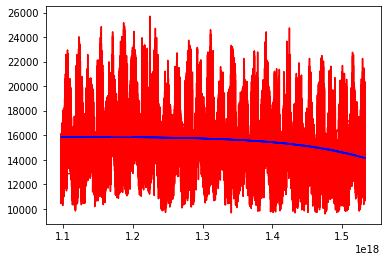

In [32]:
plt.plot(x,y, color="red")
plt.plot(x,lm.predict(xpoly), color="blue")